## AVA-Speech Results Collation and Plotting

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc

## Read in FPR and TPR for all three models

In [2]:
FPR_wav2vec2_dev = np.loadtxt("transformer_results/dev/fpr.txt")
TPR_wav2vec2_dev = np.loadtxt("transformer_results/dev/tpr.txt")

FPR_wav2vec2_test = np.loadtxt("transformer_results/test/fpr.txt")
TPR_wav2vec2_test = np.loadtxt("transformer_results/test/tpr.txt")

FPR_cnn_bilstm_dev = np.loadtxt("lstm_results/dev/fpr.txt")
TPR_cnn_bilstm_dev = np.loadtxt("lstm_results/dev/tpr.txt")

FPR_cnn_bilstm_test = np.loadtxt("lstm_results/test/fpr.txt")
TPR_cnn_bilstm_test = np.loadtxt("lstm_results/test/tpr.txt")

FPR_silero_dev = np.loadtxt("silero_results/dev/fpr.txt")
TPR_silero_dev = np.loadtxt("silero_results/dev/tpr.txt")

FPR_silero_test = np.loadtxt("silero_results/test/fpr.txt")
TPR_silero_test = np.loadtxt("silero_results/test/tpr.txt")

## Plot the ROC curve for all three models

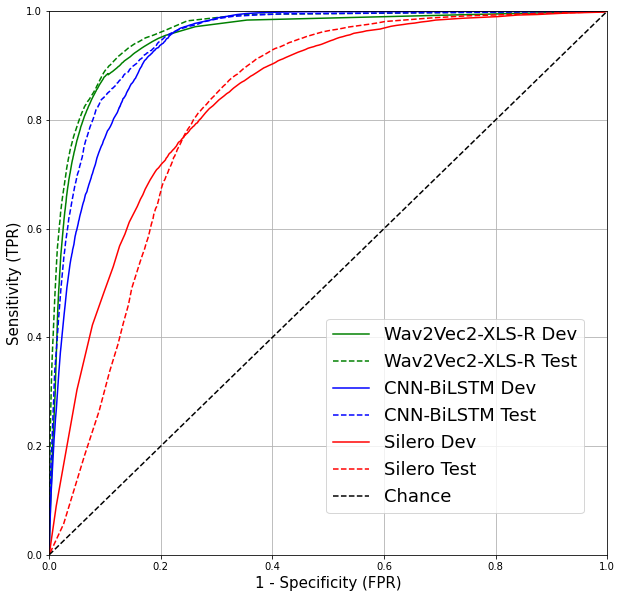

In [3]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(FPR_wav2vec2_dev,TPR_wav2vec2_dev,c='g',label='Wav2Vec2-XLS-R Dev')
ax.plot(FPR_wav2vec2_test,TPR_wav2vec2_test,c='g',linestyle='--',label='Wav2Vec2-XLS-R Test')

ax.plot(FPR_cnn_bilstm_dev,TPR_cnn_bilstm_dev,c='b',label='CNN-BiLSTM Dev')
ax.plot(FPR_cnn_bilstm_test,TPR_cnn_bilstm_test,c='b',linestyle='--',label='CNN-BiLSTM Test')

ax.plot(FPR_silero_dev,TPR_silero_dev,c='r',label='Silero Dev')
ax.plot(FPR_silero_test,TPR_silero_test,c='r',linestyle='--',label='Silero Test')

ax.plot(np.linspace(0,1,100),np.linspace(0,1,100),c='black',linestyle='--',label="Chance")
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel("1 - Specificity (FPR)",fontsize=15)
ax.set_ylabel("Sensitivity (TPR)",fontsize=15)
plt.legend(loc='lower left',bbox_to_anchor=(0.48,0.06),fontsize=18)
plt.grid()
plt.show()
#plt.savefig("roc_ava.pdf")

## Calculate AUC for ROC

In [4]:
print(f"dev wav2vec2 {auc(FPR_wav2vec2_dev,TPR_wav2vec2_dev)*100:.1f}",)
print(f"test wav2vec2 {auc(FPR_wav2vec2_test,TPR_wav2vec2_test)*100:.1f}")

dev wav2vec2 95.0
test wav2vec2 96.2


In [5]:
print(f"dev CNN BiLSTM {auc(FPR_cnn_bilstm_dev,TPR_cnn_bilstm_dev)*100:.1f}")
print(f"test CNN BiLSTM {auc(FPR_cnn_bilstm_test,TPR_cnn_bilstm_test)*100:.1f}")

dev CNN BiLSTM 93.7
test CNN BiLSTM 94.8


In [6]:
print(f"dev silero {auc(FPR_silero_dev,TPR_silero_dev)*100:.1f}")
print(f"dev silero {auc(FPR_silero_test,TPR_silero_test)*100:.1f}")

dev silero 83.9
dev silero 81.9


## Find operating point where FPR $\approx$ 0.1

In [7]:
def tpr_at_fpr_rate(TPR,FPR,fpr_rate=0.10):
    for fpr,tpr in zip(FPR,TPR):
        if fpr <= fpr_rate:
            return fpr,tpr

In [8]:
print("dev  wav2vec2",tpr_at_fpr_rate(TPR_wav2vec2_dev,FPR_wav2vec2_dev))
print("test wav2vec2",tpr_at_fpr_rate(TPR_wav2vec2_test,FPR_wav2vec2_test))

dev  wav2vec2 (0.09980225792967024, 0.8798536015765984)
test wav2vec2 (0.0993286991826613, 0.8892821882152313)


In [9]:
print("dev  CNN BiLSTM",tpr_at_fpr_rate(TPR_cnn_bilstm_dev,FPR_cnn_bilstm_dev))
print("test CNN BiLSTM",tpr_at_fpr_rate(TPR_cnn_bilstm_test,FPR_cnn_bilstm_test))

dev  CNN BiLSTM (0.0996225616316424, 0.7670086629836294)
test CNN BiLSTM (0.09976518527725009, 0.8431259255935017)


In [10]:
print("dev  silero",tpr_at_fpr_rate(TPR_silero_dev,FPR_silero_dev))
print("test silero",tpr_at_fpr_rate(TPR_silero_test,FPR_silero_test))

dev  silero (0.09838067747027202, 0.4835994073909973)
test silero (0.08960171753579182, 0.26494973746802497)
